In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [9]:
np.random.seed(0)
X = np.sort(2 * np.random.rand(100, 1) - 1, axis=0)  
y = 2 * X**2 + X + np.random.randn(100, 1) * 0.1  # Quadratic + noise

In [12]:
def plot_data(X, y):
    plt.scatter(X, y, color='blue', label='Data')
    plt.title('Synthetic Dataset')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()


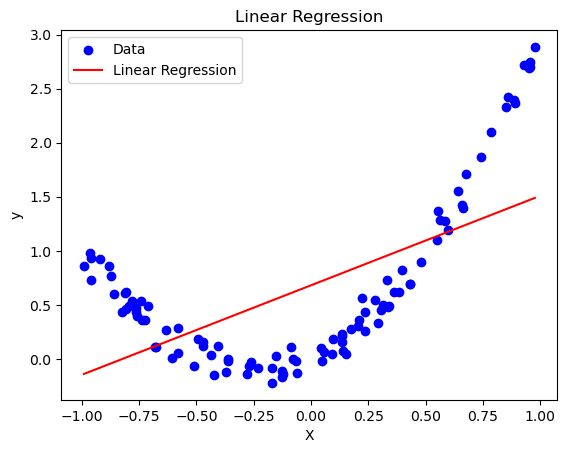

In [11]:
linear_model = LinearRegression()
linear_model.fit(X, y)

y_pred_linear = linear_model.predict(X)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Degree 1 - MSE: 0.3746
Degree 2 - MSE: 0.0095
Degree 5 - MSE: 0.0093


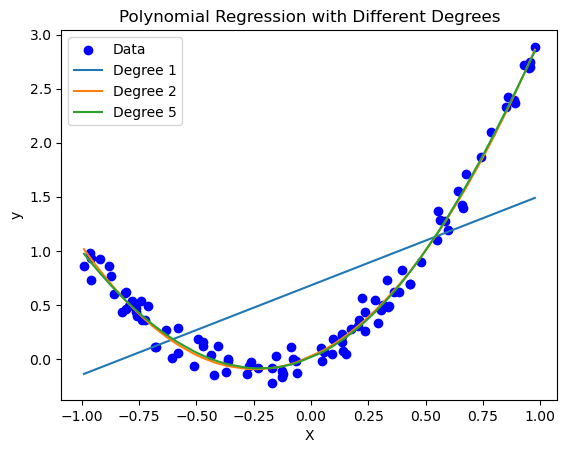

In [13]:
degrees = [1, 2, 5]
plt.scatter(X, y, color='blue', label='Data')

'''for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    
    y_pred_poly = poly_model.predict(X_poly)
    plt.plot(X, y_pred_poly, label=f'Degree {degree}')'''
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    
    y_pred_poly = poly_model.predict(X_poly)
    mse = mean_squared_error(y, y_pred_poly)
    print(f'Degree {degree} - MSE: {mse:.4f}')
    plt.plot(X, y_pred_poly, label=f'Degree {degree}')


plt.title('Polynomial Regression with Different Degrees')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

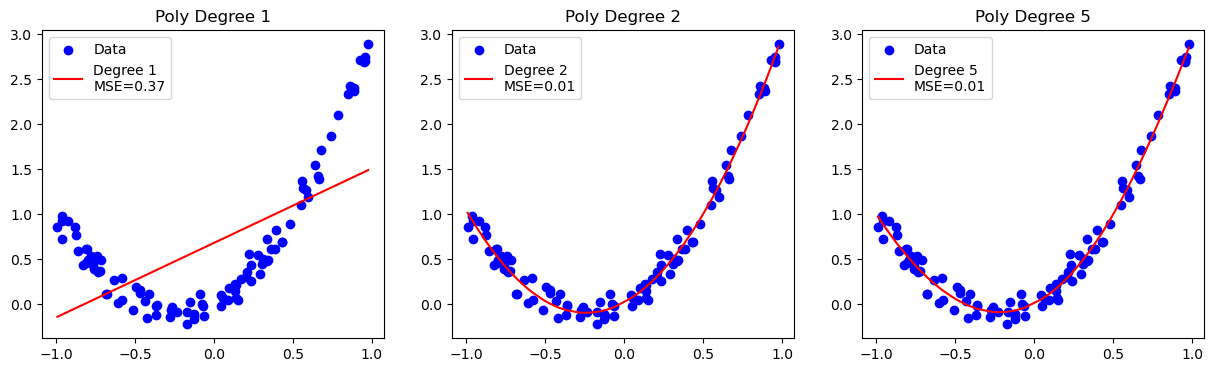

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, degree in zip(axes, degrees):
    poly = PolynomialFeatures(degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    
    ax.scatter(X, y, color='blue', label='Data')
    ax.plot(X, y_pred, label=f'Degree {degree}\nMSE={mse:.2f}', color='red')
    ax.set_title(f'Poly Degree {degree}')
    ax.legend()
